In [1]:
# %matplotlib inline
import pandas as pd #Pandas para usar dataframes
import matplotlib.pyplot as plt #Para graficar
import matplotlib.cm as cm #Para graficar el silhouette
import seaborn as sns #Para graficar
import numpy as np #Para realizar operaciones númericas con matrices y arrays
from sklearn import datasets #sklearn es LA biblioteca de machine learning de python
from sklearn.cluster import KMeans, DBSCAN #Para usar kmeans
from sklearn.preprocessing import StandardScaler #Para estandarizar nuestros datos
from sklearn.metrics import silhouette_samples, silhouette_score #Para el coeficiente de silhouette
from sklearn.cluster import AgglomerativeClustering #Para clustering jerárquico
from sklearn.metrics import pairwise_distances #Para las distancias a pares
from scipy.cluster.hierarchy import dendrogram, cophenet, linkage #Para graficar los dendrogramas y calcular el coeficiente cofenetico
from scipy.cluster import hierarchy #Para graficar los dendrogramas
from scipy.spatial.distance import pdist #Para calcular la distancia con el coeficiente cofenetico
import community as community_louvain #Para louvain
import networkx as nx #Para grafos

In [2]:
stock_data = pd.read_csv("dataset_clustering_teorico.csv")
stock_data.head()

,Unnamed: 0,2010-01-04,2010-01-05,2010-01-06,2010-01-07,2010-01-08,2010-01-11,2010-01-12,2010-01-13,2010-01-14,...,2013-10-16,2013-10-17,2013-10-18,2013-10-21,2013-10-22,2013-10-23,2013-10-24,2013-10-25,2013-10-28,2013-10-29
0,Apple,0.580000,-0.220005,-3.409998,-1.170000,1.680011,-2.689994,-1.469994,2.779997,-0.680003,...,0.320008,4.519997,2.899987,9.590019,-6.540016,5.959976,6.910011,-5.359962,0.840019,-19.589981
1,AIG,-0.640002,-0.650000,-0.210001,-0.420000,0.710001,-0.200001,-1.130001,0.069999,-0.119999,...,0.919998,0.709999,0.119999,-0.480000,0.010002,-0.279998,-0.190003,-0.040001,-0.400002,0.660000
2,Amazon,-2.350006,1.260009,-2.350006,-2.009995,2.960006,-2.309997,-1.640007,1.209999,-1.790001,...,2.109985,3.699982,9.570008,-3.450013,4.820008,-4.079986,2.579986,4.790009,-1.760009,3.740021
3,American express,0.109997,0.000000,0.260002,0.720002,0.190003,-0.270001,0.750000,0.300004,0.639999,...,0.680001,2.290001,0.409996,-0.069999,0.100006,0.069999,0.130005,1.849999,0.040001,0.540001
4,Boeing,0.459999,1.770000,1.549999,2.690003,0.059997,-1.080002,0.360000,0.549999,0.530002,...,1.559997,2.480003,0.019997,-1.220001,0.480003,3.020004,-0.029999,1.940002,1.130005,0.309998


In [3]:
stock_data.describe()

,2010-01-04,2010-01-05,2010-01-06,2010-01-07,2010-01-08,2010-01-11,2010-01-12,2010-01-13,2010-01-14,2010-01-15,...,2013-10-16,2013-10-17,2013-10-18,2013-10-21,2013-10-22,2013-10-23,2013-10-24,2013-10-25,2013-10-28,2013-10-29
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,...,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,0.277166,0.079334,-0.327333,-0.081833,0.475168,-0.291500,-0.101167,0.528000,0.303666,-0.674500,...,0.765817,0.906833,1.016166,-0.152833,0.177250,0.543083,0.311498,-0.083667,0.280001,0.274500
std,0.679217,0.793585,2.380234,2.138296,1.433856,1.118415,1.121530,1.508851,1.047321,1.831198,...,1.788782,1.824133,4.745266,1.823094,1.308681,4.159633,1.868696,2.118430,0.922479,3.488336
min,-2.350006,-3.189984,-17.599998,-15.299993,-2.020004,-4.770012,-7.170008,-0.469994,-1.790001,-13.340041,...,-0.810002,-4.200020,-1.020004,-8.159984,-6.540016,-5.029984,-6.320089,-13.620034,-1.760009,-19.589981
25%,0.040002,-0.167501,-0.212501,-0.122502,-0.025000,-0.340000,-0.185000,0.017501,-0.082495,-0.605000,...,0.095002,0.280000,-0.060001,-0.332497,-0.015002,-0.279998,-0.197503,-0.202501,-0.097504,-0.035000
50%,0.295001,0.010001,-0.005000,0.084993,0.150001,-0.059997,0.070000,0.205002,0.139999,-0.359999,...,0.335004,0.454999,0.035002,0.000000,0.174999,-0.084999,0.025001,-0.005000,0.070002,0.149998
75%,0.580000,0.325004,0.259999,0.380000,0.555002,0.112501,0.330001,0.507500,0.392499,-0.137500,...,0.805000,1.139999,0.345000,0.192502,0.577495,0.147498,0.382500,0.299998,0.400001,0.422499
max,3.029999,3.139999,1.630005,3.349991,10.020000,3.179996,1.479996,10.599985,5.949977,0.839996,...,12.160008,11.949997,34.830004,9.590019,4.820008,30.409929,10.140000,4.790009,5.910034,17.139948


No tienen distribucion normal porque la media es diferente a la mediana

In [4]:
#stock_data_numerico = pd.read_csv("dataset_clustering_teorico.csv", index_col= 0)
#stock_data_numerico      eso es una manera

stock_data_numerico= pd.read_csv("dataset_clustering_teorico.csv")

In [5]:
columnas = list(stock_data_numerico.columns)

In [6]:
columnas

['Unnamed: 0',
 '2010-01-04',
 '2010-01-05',
 '2010-01-06',
 '2010-01-07',
 '2010-01-08',
 '2010-01-11',
 '2010-01-12',
 '2010-01-13',
 '2010-01-14',
 '2010-01-15',
 '2010-01-19',
 '2010-01-20',
 '2010-01-21',
 '2010-01-22',
 '2010-01-25',
 '2010-01-26',
 '2010-01-27',
 '2010-01-28',
 '2010-01-29',
 '2010-02-01',
 '2010-02-02',
 '2010-02-03',
 '2010-02-04',
 '2010-02-05',
 '2010-02-08',
 '2010-02-09',
 '2010-02-10',
 '2010-02-11',
 '2010-02-12',
 '2010-02-16',
 '2010-02-17',
 '2010-02-18',
 '2010-02-19',
 '2010-02-22',
 '2010-02-23',
 '2010-02-24',
 '2010-02-25',
 '2010-02-26',
 '2010-03-01',
 '2010-03-02',
 '2010-03-03',
 '2010-03-04',
 '2010-03-05',
 '2010-03-08',
 '2010-03-09',
 '2010-03-10',
 '2010-03-11',
 '2010-03-12',
 '2010-03-15',
 '2010-03-16',
 '2010-03-17',
 '2010-03-18',
 '2010-03-19',
 '2010-03-22',
 '2010-03-23',
 '2010-03-24',
 '2010-03-25',
 '2010-03-26',
 '2010-03-29',
 '2010-03-30',
 '2010-03-31',
 '2010-04-01',
 '2010-04-05',
 '2010-04-06',
 '2010-04-07',
 '2010-04-

In [37]:
del(columnas[0])

In [8]:
columnas

['2010-01-04',
 '2010-01-05',
 '2010-01-06',
 '2010-01-07',
 '2010-01-08',
 '2010-01-11',
 '2010-01-12',
 '2010-01-13',
 '2010-01-14',
 '2010-01-15',
 '2010-01-19',
 '2010-01-20',
 '2010-01-21',
 '2010-01-22',
 '2010-01-25',
 '2010-01-26',
 '2010-01-27',
 '2010-01-28',
 '2010-01-29',
 '2010-02-01',
 '2010-02-02',
 '2010-02-03',
 '2010-02-04',
 '2010-02-05',
 '2010-02-08',
 '2010-02-09',
 '2010-02-10',
 '2010-02-11',
 '2010-02-12',
 '2010-02-16',
 '2010-02-17',
 '2010-02-18',
 '2010-02-19',
 '2010-02-22',
 '2010-02-23',
 '2010-02-24',
 '2010-02-25',
 '2010-02-26',
 '2010-03-01',
 '2010-03-02',
 '2010-03-03',
 '2010-03-04',
 '2010-03-05',
 '2010-03-08',
 '2010-03-09',
 '2010-03-10',
 '2010-03-11',
 '2010-03-12',
 '2010-03-15',
 '2010-03-16',
 '2010-03-17',
 '2010-03-18',
 '2010-03-19',
 '2010-03-22',
 '2010-03-23',
 '2010-03-24',
 '2010-03-25',
 '2010-03-26',
 '2010-03-29',
 '2010-03-30',
 '2010-03-31',
 '2010-04-01',
 '2010-04-05',
 '2010-04-06',
 '2010-04-07',
 '2010-04-08',
 '2010-04-

In [9]:
stock_data_numerico = stock_data_numerico[columnas]
stock_data_numerico

,2010-01-04,2010-01-05,2010-01-06,2010-01-07,2010-01-08,2010-01-11,2010-01-12,2010-01-13,2010-01-14,2010-01-15,...,2013-10-16,2013-10-17,2013-10-18,2013-10-21,2013-10-22,2013-10-23,2013-10-24,2013-10-25,2013-10-28,2013-10-29
0,0.580000,-0.220005,-3.409998,-1.170000,1.680011,-2.689994,-1.469994,2.779997,-0.680003,-4.999995,...,0.320008,4.519997,2.899987,9.590019,-6.540016,5.959976,6.910011,-5.359962,0.840019,-19.589981
1,-0.640002,-0.650000,-0.210001,-0.420000,0.710001,-0.200001,-1.130001,0.069999,-0.119999,-0.500000,...,0.919998,0.709999,0.119999,-0.480000,0.010002,-0.279998,-0.190003,-0.040001,-0.400002,0.660000
2,-2.350006,1.260009,-2.350006,-2.009995,2.960006,-2.309997,-1.640007,1.209999,-1.790001,-2.039994,...,2.109985,3.699982,9.570008,-3.450013,4.820008,-4.079986,2.579986,4.790009,-1.760009,3.740021
3,0.109997,0.000000,0.260002,0.720002,0.190003,-0.270001,0.750000,0.300004,0.639999,-0.130001,...,0.680001,2.290001,0.409996,-0.069999,0.100006,0.069999,0.130005,1.849999,0.040001,0.540001
4,0.459999,1.770000,1.549999,2.690003,0.059997,-1.080002,0.360000,0.549999,0.530002,-0.709999,...,1.559997,2.480003,0.019997,-1.220001,0.480003,3.020004,-0.029999,1.940002,1.130005,0.309998
5,0.450000,0.460001,0.180000,0.250000,-0.199999,-0.060000,-0.359998,0.190001,0.190001,-0.379999,...,0.240000,0.210000,-0.050000,-0.010000,-0.030000,-0.240000,0.050000,0.110000,-0.060000,-0.110000
6,0.180000,0.220001,0.040001,0.250000,-0.360001,-0.099999,0.570000,-0.139999,0.260002,-0.150002,...,0.220001,2.250000,0.470001,0.320000,-0.040001,-0.430000,-0.019997,-0.129998,0.330002,1.150001
7,0.730000,0.369999,-0.099999,-0.169999,0.030003,0.110001,-0.079998,0.140000,0.389999,-0.130001,...,0.209999,0.560002,0.069999,0.119999,0.050003,-0.459999,0.259998,-0.109999,0.090001,-0.110001
8,0.899997,0.700001,0.250000,0.369999,1.090000,3.179996,-0.769996,0.230004,-0.119998,-1.330002,...,0.209999,0.519996,1.029998,-0.020004,1.290001,-0.390000,1.209999,0.449997,-0.220001,0.159996
9,0.360000,0.909996,-0.290001,-0.059998,1.300003,0.510003,1.050003,0.529999,-0.360001,-0.540001,...,0.949997,1.520001,-0.320000,-0.500000,1.080002,0.280002,0.620003,0.359996,1.070003,1.050003


In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
stock_data_escaleado= scaler.fit_transform(stock_data_numerico)
stock_data_escaleado

array([[ 0.4496197 , -0.38038084, -1.30603921, ..., -2.51168159,
         0.61220263, -5.74259972],
       [-1.36172667, -0.92679173,  0.04971049, ...,  0.02078649,
        -0.74336873,  0.11144388],
       [-3.90058279,  1.50032885, -0.85695009, ...,  2.32002256,
        -2.23010689,  1.00184359],
       ...,
       [ 0.22691503,  0.19145242,  0.38017522, ..., -0.08394087,
         0.1311819 ,  0.05940875],
       [-0.27788708, -0.0881048 ,  0.1047883 , ...,  0.02554728,
        -0.28422918, -0.08802742],
       [-0.17395902, -0.08810353,  0.13868208, ...,  0.01126587,
        -0.02186716, -0.05044645]])

tipos de anomalias que hay que tratar: nulos, duplicados, outlayers

In [11]:
from sklearn.cluster import KMeans, DBSCAN #Para usar kmeans

k = 14 #definimos la cantidad de clusters
kmeans = KMeans(n_clusters = k, init="random", n_init=10, max_iter=300, random_state=123457) #tomamos los centroides de forma aleatoria y definimos un máximo de 300 iteraciones
kmeans.fit(stock_data_escaleado)  #aplicamos el método a nuestros datos

KMeans(init='random', n_clusters=14, random_state=123457)

In [12]:
print(kmeans.labels_)

[10  8 12  8 11  0  7  0 11  5 11  0 11  0  0  0  0  6  2  0  0  0  9 11
  0  3  8  3 13 11  4  3 11  0  0 11 11  7  3  0  1  3  7  7 11  0  0  0
  0  7  0  0  0  0  0  8  0 11  0  0]


In [13]:
print(kmeans.cluster_centers_)

[[-0.03519481 -0.04411763  0.1601917  ...  0.01749126 -0.21107052
  -0.04455313]
 [-0.39666666 -0.08810734  0.10055116 ... -0.22199043  0.99479851
   0.20973409]
 [ 4.0871521   3.88930315 -0.335835   ...  1.03473179 -0.90734745
  -0.06779294]
 ...
 [ 0.60078927  0.24806402  0.35167417 ...  0.26875623 -0.06062064
   0.11144396]
 [-3.90058279  1.50032885 -0.85695009 ...  2.32002256 -2.23010689
   1.00184359]
 [-0.58967421 -0.73618107  0.13021033 ...  0.1302737   0.3388869
  -0.01286461]]


ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not ['golden' 'grey' 'white' 'grey' 'light blue' 'red' 'pink' 'red'
 'light blue' 'brown' 'light blue' 'red' 'light blue' 'red' 'red' 'red'
 'red' 'purple' 'blue' 'red' 'red' 'red' 'orange' 'light blue' 'red'
 'yellow' 'grey' 'yellow' 'light grey' 'light blue' 'black' 'yellow'
 'light blue' 'red' 'red' 'light blue' 'light blue' 'pink' 'yellow' 'red'
 'green' 'yellow' 'pink' 'pink' 'light blue' 'red' 'red' 'red' 'red'
 'pink' 'red' 'red' 'red' 'red' 'red' 'grey' 'red' 'light blue' 'red'
 'red']

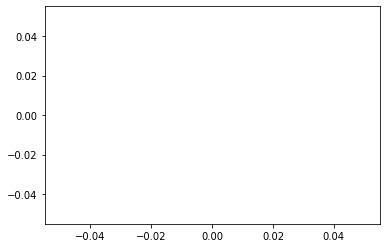

In [14]:
import seaborn as sns
coloresee = ["red", "green", "blue", "yellow", "black", "brown", 'purple', "pink", "grey", "orange", "golden", "light blue", "white", "light grey"]
g = sns.scatterplot(x = stock_data_escaleado[:,2], y = stock_data_escaleado[:, 3], hue = kmeans.labels_, palette = coloresee, alpha = 0.5) #indicas las columnas que queres
g = sns.scatterplot(x = kmeans.cluster_centers_[:,2], y = kmeans.cluster_centers_[:,3], zorder = 10, palette = coloresee, hue = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13], legend = False, marker=6, s=200) #indico centroides

<AxesSubplot:xlabel='2010-01-04', ylabel='Count'>

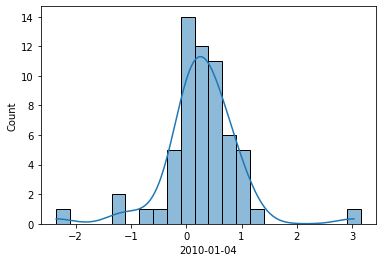

In [ ]:
sns.histplot(data= stock_data_numerico, x = "2010-01-04", binwidth= 0.25, kde= True)

In [25]:
inercias = {}
def inercias_por_k(diccionario):
    for i in range(1, 21):
        kmeans = KMeans(n_clusters= i, init="random", n_init=20, max_iter=300, random_state=123457)
        kmeans.fit(stock_data_escaleado)
        diccionario[i]= kmeans.inertia_

In [26]:
inercias_por_k(inercias)
inercias

{1: 57780.000000000015,
 2: 38971.711992653734,
 3: 28677.700172041903,
 4: 19607.487209389514,
 5: 14497.33618465505,
 6: 11625.157875595343,
 7: 9428.822990816832,
 8: 16389.81569362645,
 9: 11478.660872660863,
 10: 11275.926548024425,
 11: 10770.960581361573,
 12: 8486.770281621022,
 13: 7850.753828515641,
 14: 7744.968088325988,
 15: 7520.433927752779,
 16: 6083.312640535194,
 17: 5943.50230909991,
 18: 5525.814654033073,
 19: 5423.857553220989,
 20: 4857.618700608169}

In [27]:
print(kmeans.inertia_)

7744.968088325988


In [28]:
from scipy import stats

w, p= stats.shapiro(stock_data_numerico)
p

c:\Users\Franco\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_morestats.py:1761: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


0.0

<AxesSubplot:xlabel='k', ylabel='inercia'>

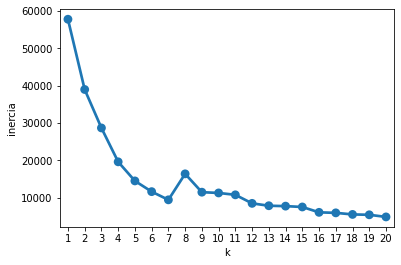

In [29]:
df_inercias = pd.DataFrame(inercias.items(), columns= ["k", "inercia"])
sns.pointplot(data= df_inercias, x="k", y="inercia")

In [30]:
from sklearn.metrics import silhouette_samples, silhouette_score #Para el coeficiente de silhouette
#Calculamos el promedio del silhouette de todos
silhouette_avg = silhouette_score(stock_data_escaleado, kmeans.labels_)
#Calculamos el silhouette de cada punto
sample_silhouette_values = silhouette_samples(stock_data_escaleado, kmeans.labels_)

import matplotlib.pyplot as plt 
import matplotlib.cm as cm 
import numpy as np
def graficarSilhouette (k, labels, sample_silhouette_values, silhouette_avg):
  fig, ax1 = plt.subplots(1, 1)
  y_lower = 10
  for i in range(k):
      ith_cluster_silhouette_values = \
          sample_silhouette_values[labels == i]

      ith_cluster_silhouette_values.sort()

      size_cluster_i = ith_cluster_silhouette_values.shape[0]
      y_upper = y_lower + size_cluster_i

      color = cm.nipy_spectral(float(i) / k)
      ax1.fill_betweenx(np.arange(y_lower, y_upper),
                        0, ith_cluster_silhouette_values,
                        facecolor=color, edgecolor=color, alpha=0.7)
      ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
      y_lower = y_upper + 10

  ax1.set_title("Plot del silhouette de cada cluster")
  ax1.set_xlabel("Coeficiente de silhouette")
  ax1.set_ylabel("Etiqueta del cluster")
  ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
  ax1.set_yticks([])

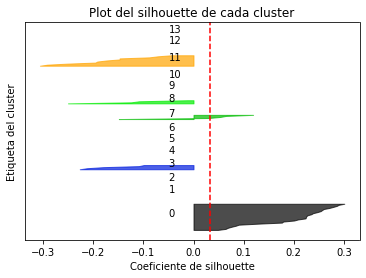

In [31]:
graficarSilhouette(k, kmeans.labels_, sample_silhouette_values, silhouette_avg)

In [34]:
from sklearn.metrics import silhouette_samples, silhouette_score #Para el coeficiente de silhouette
#Calculamos el promedio del silhouette de todos
silhouette_avg = silhouette_score(stock_data_escaleado, kmeans.labels_)
#Calculamos el silhouette de cada punto
sample_silhouette_values = silhouette_samples(stock_data_escaleado, kmeans.labels_)

In [35]:
sample_silhouette_values

array([ 0.        , -0.01187917,  0.        , -0.12452138, -0.14755606,
        0.27083136,  0.05318242,  0.20080346, -0.07119051,  0.        ,
       -0.25116767,  0.25369228, -0.17404249,  0.08427229,  0.23829293,
        0.28585097,  0.2598849 ,  0.        ,  0.        ,  0.17633982,
        0.09029169,  0.24688307,  0.        , -0.0441652 ,  0.22428209,
       -0.22682567, -0.10869879, -0.18000705,  0.        , -0.19575796,
        0.        , -0.10896712, -0.19185353,  0.22745491,  0.30072473,
       -0.14732879, -0.29160753, -0.14896289, -0.21235305,  0.22488978,
        0.        , -0.0991594 ,  0.11884692,  0.02961744, -0.08822638,
        0.25655345,  0.07568318,  0.23488418,  0.06840662,  0.06486069,
        0.2786895 ,  0.17902386,  0.22328045,  0.12976124,  0.04859155,
       -0.25033036,  0.0641258 , -0.30631043,  0.28965127,  0.20830539])